# CHAPTER 06. 차원 축소
## 01. 차원 축소(Dimension Reduction)의 개요

- **차원 축소** : 매우 많은 피처로 구성된 다차원 데이터 세트의 차원을 축소해 새로운 차원의 데이터 세트를 생성하는 것
- 차원이 증가할수록 단점 
	1.  데이터 포인트 간의 거리가 기하급수적으로 멀어지게 되고, 희소한 구조를 가지게 된다. 
	2. 예측 신뢰도가 떨어진다.
	3. 개별 피처간에 상관관계가 높을 가능성이 커, 다중공선성 문제로 예측 성능 저하된다.
- 차원 축소를해 피처 수를 줄이게 되면 
	1. 더 직관적으로 데이터를 해석할 수 있다.
	2. 학습 데이터의 크기가 줄어들어 학습에 필요한 처리 능력 줄일 수 있다.

- 차원축소
	1. **피처(특성) 선택** : 말 그대로 특정 피처에 종속성이 강한 불필요한 피처는 아예 제거하고, 데이터의 특징을 잘 나타내는 주요 피처만 선택
	2. **피처(특성) 추출** : 기존 피처를 저차원의 중요피처로 압축해서 추출하는것. 기존의 피처와는 다른 값이 된다. 
		- 단순 압축이 아닌, 피처를 함축적으로 더 잘 설명할 수 있는 또 다른 공간으로 매핑해 추출하는 것
		- 함축적인 특성 추출은 기존 피처가 전혀 인지하기 어려웠던 잠재적인 요소(Latent Factor)를 추출하는 것을 말한다.
        
        
이처럼 차원 축소는 단순히 데이터의 압축을 의미하는 것이 아닌, **차원 축소를 통해 좀 더 데이터를 잘 설명할 수 있는 잠재적인 요소를 추출**하는 데에 있다. 대표적으로 PCA, SVD, NMF 알고리즘이 있다.

- 차원 축소 알고리즘의 사용
	1. 매우 많은 픽셀로 이뤄진 이미지 데이터에서 잠재된 특성을 피처로 도출해 함축적 형태의 이미지 변환과 압축 수행
		- 예측 성능에 많은 도움이 된다.
	2. 텍스트 문서의 숨겨진 의미 추출
		- 문서 내 단어들의 구성에서 숨겨저 있는 시맨틱 의미나 토픽을 잠재 요소로 간주하고 이를 찾아낸다.
		- SVD, NMF는 시맨틱 토픽 모델링을 위한 기반 알고리즘으로 사용된다.

## 02. PCA(Principal Component Analysis)
### PCA 개요
: 가장 대표적인 차원 축소 기법. 여러 변수 간에 존재하는 상관관계를 이용해 이를 대표하는 주성분을 추출해 차원을 축소하는 기법. 
- PCA로 차원을 축소할 때는 기존 데이터의 정보 유실이 최소화되는 것이 당연하다. 이를 위해서 PCA는 가장 높은 분산을 가지는 데이터의 축을 찾아 이 축으로 차원을 축소하는데, 이것이 PCA의 주성분이 된다.(즉, 분산이 데이터의 특성을 가장 잘 나타내는 것으로 간주하는 것이다.)

- 데이터 변동성이 가장 큰 방향으로 축을 생성하고, 새롭게 생성된 축으로 데이터를 투영하는 방식
1. 제일 먼저 가장 큰 데이터 변동성(Variance)를 기반으로 첫 번째 벡터 축 생성.
2. 두번째 축은 이 벡터 축에 직각이 되는 벡터(직교 벡터)를 축으로 한다.
3. 세 번째 축은 다시 두 번째 축과 직각이 되는 벡터를 설정하는 방식
- 이렇게 생성된 벡터 축에 원본 데이터를 추영하면 벡터 축의 개수만큼의 차원으로 원본 데이터가 차원 축소 된다.

**PCA, 즉, 주성분 분석은 이처럼 원본 데이터의 피처 개수에 비해 매우 작은 주성분으로 원본 데이터의 총 변동성을 대부분 설명할 수 있는 분석법이다.**

#### 붓꽃(iris) 데이터 세트의 4개 속성을 2개의 PCA 차원으로 압축해 원래 데이터 세트와 압축된 데이터 세트가 어떻게 달라졌는지 확인

In [4]:
from sklearn.datasets import load_iris
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

iris = load_iris()
# 넘파이 데이터 세트를 판다스 DataFrame으로 변환(시각화하기 편하도록)
columns = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width']
irisDF = pd.DataFrame(iris.data, columns=columns)
irisDF['target'] = iris.target
irisDF.head(3)

,sepal_length,sepal_width,petal_length,petal_width,target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0


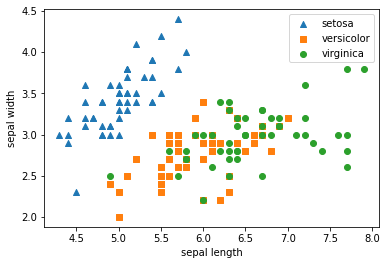

In [6]:
# 원본 붓꽃 데이터 세트의 분포 파악을 위해 2차원으로 시각화

# setosa는 세모, versicolor는 네모, virginica는 동그라미로 표현
markers=['^', 's', 'o']

# setosa의 target 값은 0, versicolor는 1, virginica는 2. 각 target별로 다른 모양으로 산점도로 표시
for i, marker in enumerate(markers):
    x_axis_data = irisDF[irisDF['target']==i]['sepal_length']
    y_axis_data = irisDF[irisDF['target']==i]['sepal_width']
    plt.scatter(x_axis_data, y_axis_data, marker=marker, label=iris.target_names[i])

plt.legend()
plt.xlabel('sepal length')
plt.ylabel('sepal width')
plt.show()

Setosa 품종의 경우 sepal width가 3.0보다 크고, sepal length가 6.0 이하인 곳에 일정하게 분포돼 있다. Versicolor와 virginica의 경우는 sepal width와 sepal length 조건만으로는 분류가 어려운 복잡한 조건임을 알 수 있다.


- PCA로 4개 속성을 2개로 압축하기 전에, 개별 속성을 함께 스케일링해야 한다. PCA는 여러 속성의 값을 연산해야 하므로 속성의 스케일에 영향을 받는다. 따라서 **여러 속성을 PCA로 압축하기 전에 각 속성값을 동일한 스케일로 변환하는 것이 필요하다.**

In [9]:
from sklearn.preprocessing import StandardScaler

# Target 값을 제외한 모든 속성 값을 표준 정규 분포(평균 0, 분산 1)를 가지는 값들로 변환
iris_scaled = StandardScaler().fit_transform(irisDF.iloc[:, :-1])

In [11]:
# PCA를 적용해 4차원(4개 속성)의 붓꽃 데이터를 2차원(2개의 PCA속성) PCA 데이터로 변환

from sklearn.decomposition import PCA

# n_components : PCA로 변환할 차원의 수 
pca = PCA(n_components=2)

# fit()과 transform()을 호출해 PCA 변환 데이터 반환
pca.fit(iris_scaled)
iris_pca = pca.transform(iris_scaled)
print(iris_pca.shape)

(150, 2)


iris_pca는 변환된 PCA 데이터 세트를 150x2 넘파이 행렬로 가지고 있다 !

In [12]:
# 넘파이 행렬을 DataFrame으로 변환하기

# PCA 변환된 데이터의 칼럼 명을 각각 pca_component_1, pca_component_2로 명명
pca_columns=['pca_component_1', 'pca_component_2']
irisDF_pca = pd.DataFrame(iris_pca, columns=pca_columns)
irisDF_pca['target'] = iris.target
irisDF_pca.head(3)

,pca_component_1,pca_component_2,target
0,-2.264703,0.480027,0
1,-2.080961,-0.674134,0
2,-2.364229,-0.341908,0


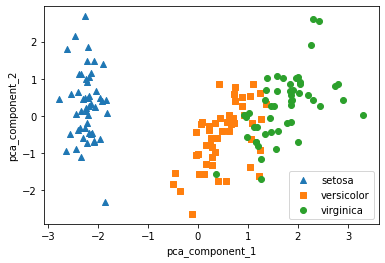

In [13]:
# 2개의 속성으로 PCA 변환된 데이터 세트를 2차원상에서 시각화

# setosa는 세모, versicolor는 네모, virginica는 동그라미로 표현
markers=['^', 's', 'o']

# pca_component_1을 x축, pca_component_2를 y축으로 
for i, marker in enumerate(markers):
    x_axis_data = irisDF_pca[irisDF_pca['target']==i]['pca_component_1']
    y_axis_data = irisDF_pca[irisDF_pca['target']==i]['pca_component_2']
    plt.scatter(x_axis_data, y_axis_data, marker=marker, label=iris.target_names[i])

plt.legend()
plt.xlabel('pca_component_1')
plt.ylabel('pca_component_2')
plt.show()

In [15]:
print(pca.explained_variance_ratio_)

[0.72962445 0.22850762]


In [16]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
import numpy as np

rcf = RandomForestClassifier(random_state=156)
scores = cross_val_score(rcf, iris.data, iris.target, scoring='accuracy', cv=3)
print('원본 데이터 교차 검증 개별 정확도: ', scores)
print('원본 데이터 평균 정확도: ', np.mean(scores))

원본 데이터 교차 검증 개별 정확도:  [0.98 0.94 0.96]
원본 데이터 평균 정확도:  0.96


In [18]:
pca_X = irisDF_pca[['pca_component_1', 'pca_component_2']]
scores_pca = cross_val_score(rcf, pca_X, iris.target, scoring='accuracy', cv=3)
print('PCA 변환 데이터 교차 검증 개별 정확도: ', scores_pca)
print('PCA 변환 데이터 평균 정확도: ', np.mean(scores_pca))

PCA 변환 데이터 교차 검증 개별 정확도:  [0.88 0.88 0.88]
PCA 변환 데이터 평균 정확도:  0.88
